# 6.6 Sourcing & Analyzing Time-Series Data

In this excercise I will be working on my student project dataset which already contains a time component. The dataset referes to agri-food emission produced by countries for the time period 1990-2020.

### This script contains the following:

#### 1. Importing  libraries and data
#### 2. Wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the agri-food emission data

### 1. Importing  libraries and data

Before  staring this analysis, we need a new library that  haven't  installed before—Quandl. Install Quandl using conda:

`conda install quandl`

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path =r'C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis'

In [3]:
df = pd.read_csv(os.path.join(path, '02_Data','Prepared data', 'agri_food_emission.csv'))

In [4]:
df.head(5)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
1,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
2,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
3,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
4,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667


In [5]:
df.shape

(4546, 31)

In [6]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

### 2. Wrangling, and cleaning time-series data

In [7]:
# Selecting the columns relevant for the planned analysis from my dataset. This columns are the 'Year' and'total_emission' variables
df=df[['Year','total_emission']]

In [8]:
df.head()

,Year,total_emission
0,1990,3475.291240
1,1991,5680.135772
2,1992,5221.131572
3,1993,5316.973272
4,1994,5564.287672


In [9]:
df.shape

(4546, 2)

In [10]:
df.columns

Index(['Year', 'total_emission'], dtype='object')

In [11]:
# Setting the index column to the 'Year' variable

df.set_index('Year', inplace=True)

In [12]:
df.columns

Index(['total_emission'], dtype='object')

In [13]:
# Grouping the data by year as the original dataset contains data for countries across the world. By aggregating we will be fousing on the average value at the global scale

df=df.groupby('Year').agg({'total_emission':'mean'})

In [14]:
df.shape

(31, 1)

In [15]:
df.head()

,total_emission
Year,
1990,77006.190561
1991,78691.703875
1992,69620.631383
1993,69353.074296
1994,70341.104378


In [16]:
# Check for missing values 

df.isnull().sum() # No missing values

total_emission    0
dtype: int64

In [17]:
# Check for duplicates
dups = df.duplicated()
dups.sum()

# No dups!

0

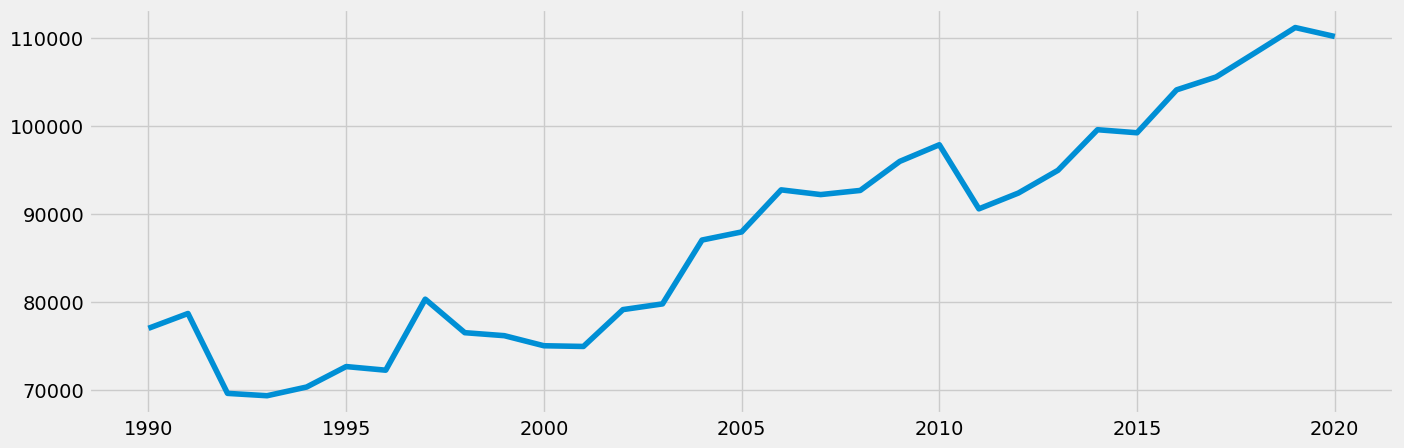

In [18]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

### 3. Time-series analysis: decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='muliplictive', period=1)

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

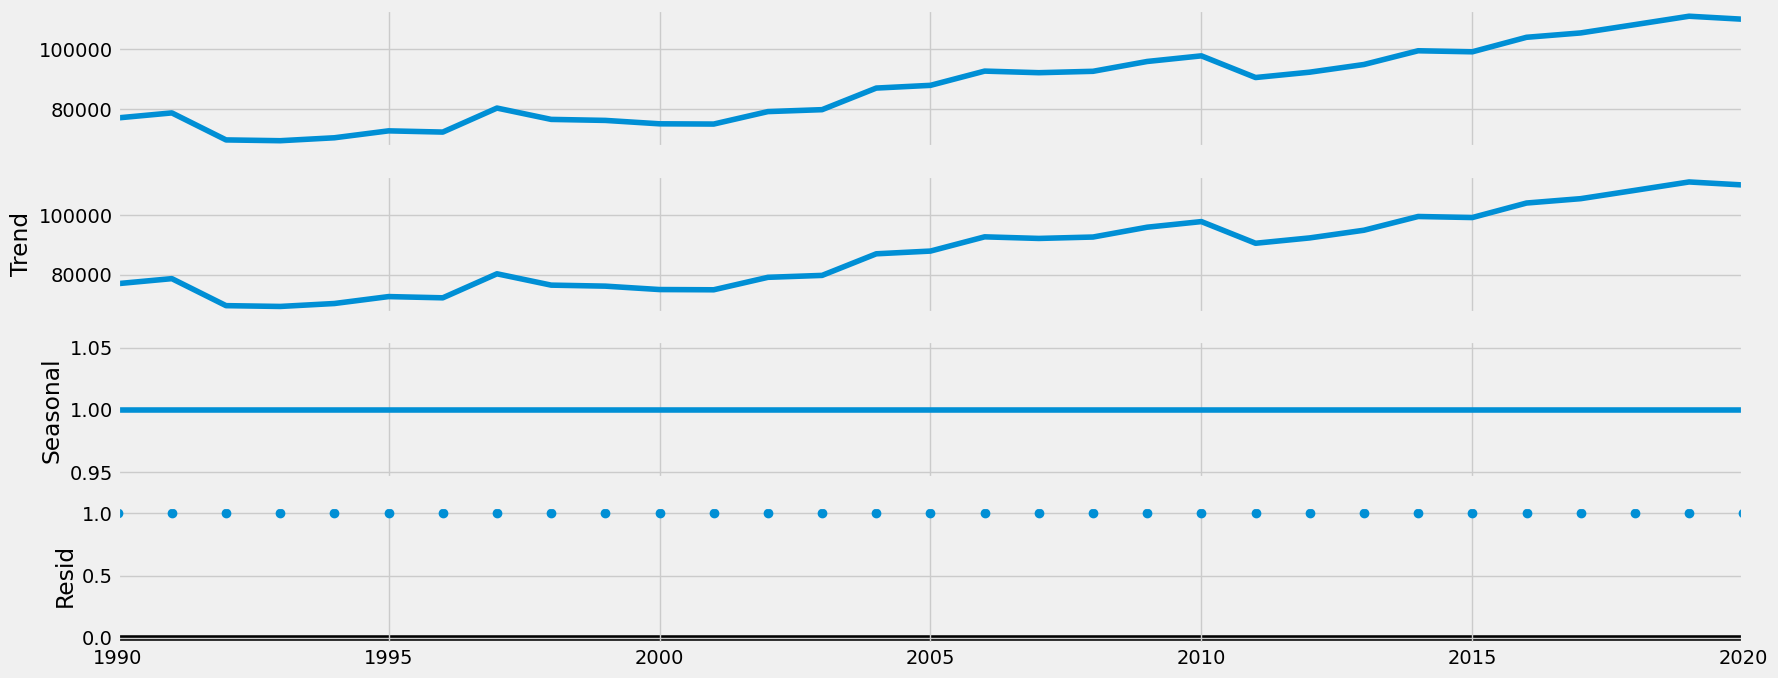

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

 The first and the second chart represent the data itself and the trend respectively. The level (data itself) and trend appear the same. This is because the data was not smoothed ( since it is an annual data we do not expect a lot of fluctuation since no need to smooth the data). The seasonal chart does not show any seasonal fluctuations may be this is beacuse this is an annnual data. The fourth chart refers to the residual. The residual chart suggests that there is not much unexplained noise.

### 4. Testing for stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['total_emission'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.081896
p-value                         0.964803
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


The null hypothesis is the presence of a unit root.The test statistics (0.081896) is larger than the critical value at 5 % (-2.964071). It means we can not reject the null hypothesis.This means that the data is non-stationary.

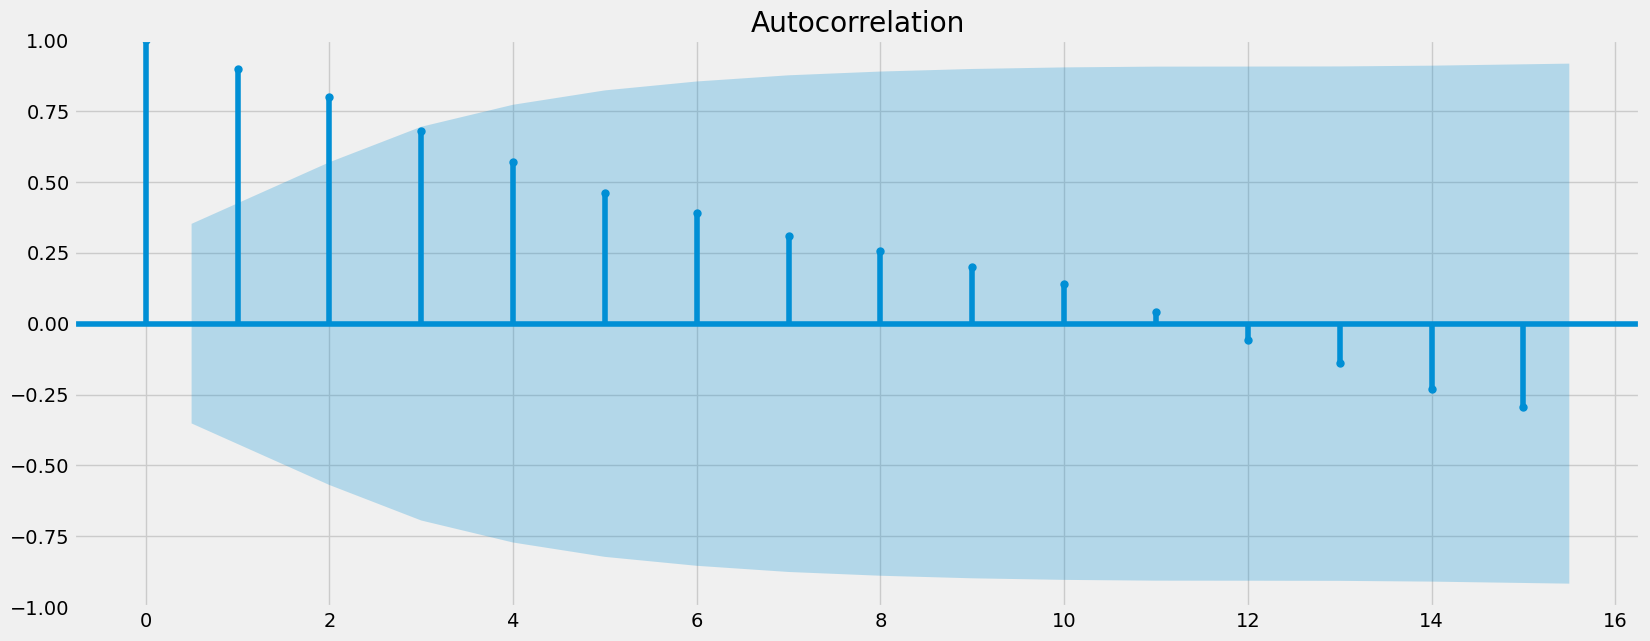

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

### 5. Stationarizing the agri-food emission data

In [24]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [25]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [26]:
data_diff.head()

,total_emission
Year,
1991,1685.513314
1992,-9071.072493
1993,-267.557087
1994,988.030082
1995,2323.557707


In [27]:
data_diff.columns

Index(['total_emission'], dtype='object')

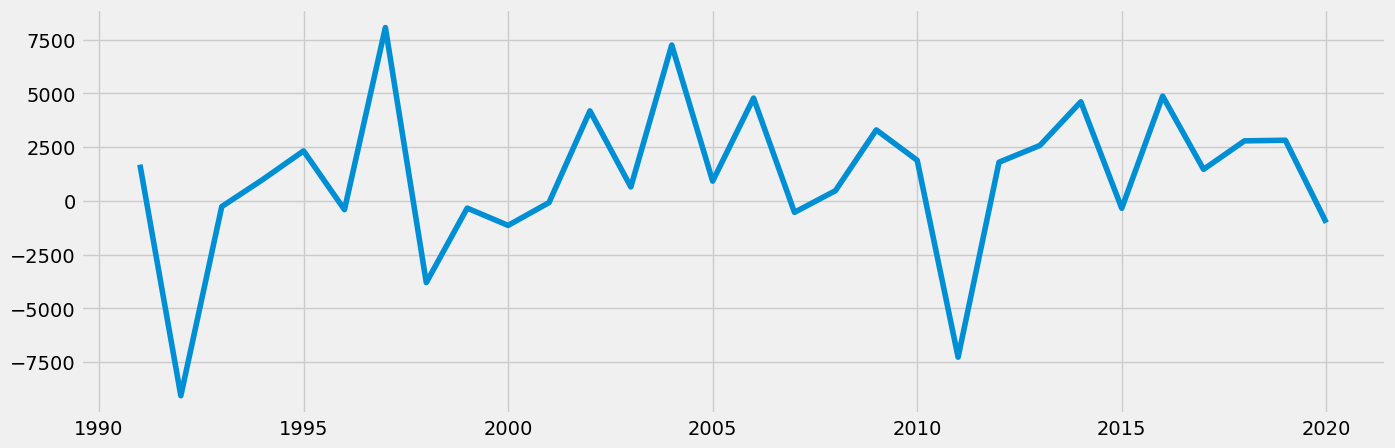

In [28]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.012059e+00
p-value                        1.564950e-07
Number of Lags Used            0.000000e+00
Number of Observations Used    2.900000e+01
Critical Value (1%)           -3.679060e+00
Critical Value (5%)           -2.967882e+00
Critical Value (10%)          -2.623158e+00
dtype: float64


The null hypothesis is the presence of a unit root.The test statistics (-6.012059) is less than the critical value at 5 % (-2.967882). It means we can  reject the null hypothesis.This means that the data is stationary.

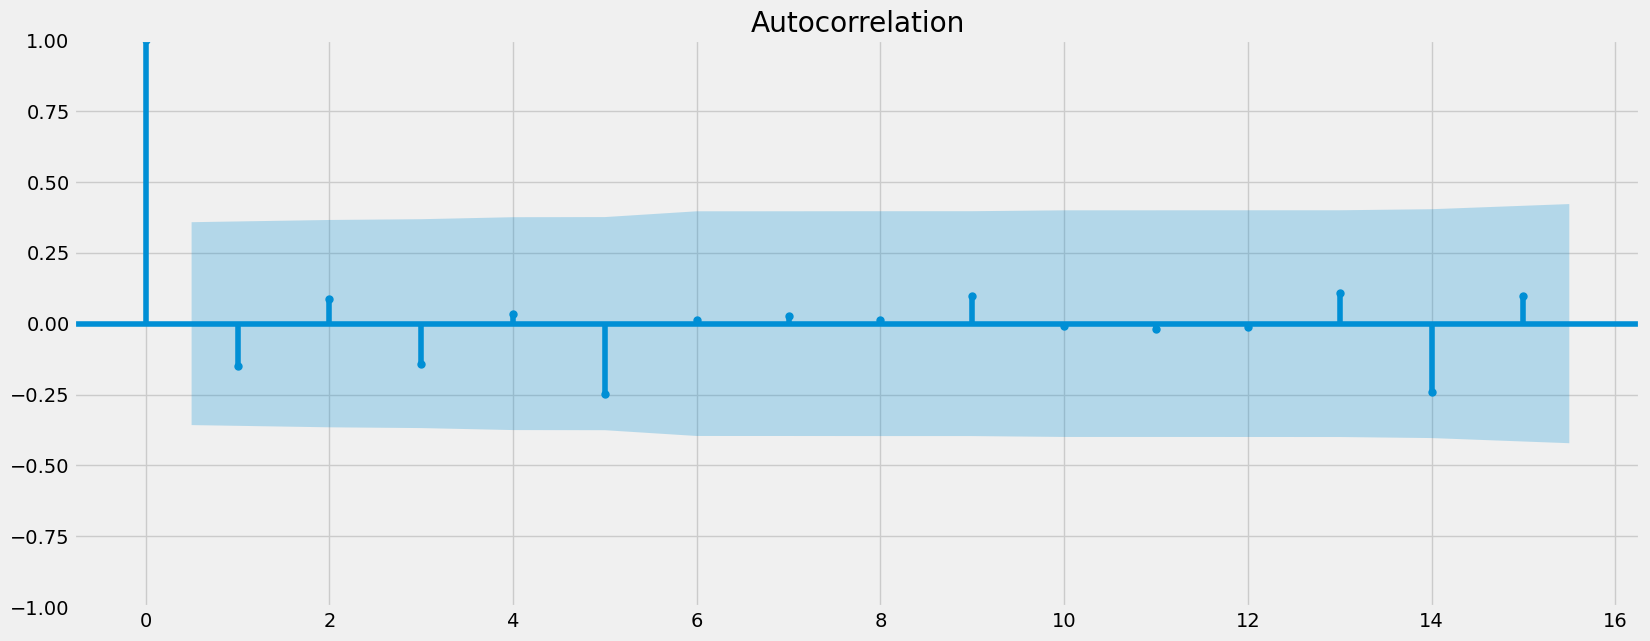

In [30]:
plot_acf(data_diff)
plt.show()

All the lines are within the blue confidence interval suggesting that there are no lages that are significantly correlated with each other.It means no autocorrelated data